<a href="https://colab.research.google.com/github/raihanewubd/24FALL-AI/blob/main/DEv3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# differential evolution search of the two-dimensional sphere objective function
from numpy.random import rand
from numpy.random import choice
from numpy import asarray
from numpy import clip
from numpy import argmin
from numpy import min
from numpy import around
from matplotlib import pyplot
import numpy as np
import plotly.graph_objects as go
import matplotlib.pyplot as plt

In [ ]:
DEBUG_LEVEL = 0
ALL_POP = {}


# Objective Function Definition
The objective function is:  $f(x) = x_0^2 + x_1^2$

where ($x_0$) and ($x_1$) are the decision variables. We want to find the values of ($x_0$) and ($x_1$) that minimize or maximize this function within the specified value range of -5 to 5.

To be more precise, we can state the optimization problem as follows:

Minimize: $f(x) = x_0^2 + x_1^2$

Subject to: $ -5 \leq x_0 \leq 5 $,  $-5 \leq x_1 \leq 5$

This means we’re looking for the values of ($x_0$) and ($x_1$) that minimize the sum of their squares while staying within the specified bounds.

In [ ]:
# define objective function
def obj(x):
    #return x[0]**2.0 + x[1]**2.0
    return -20 * np.exp(-0.2 * np.sqrt(0.5 * (x[0]**2 + x[1]**2))) - np.exp(0.5 * (np.cos(2*np.pi*x[0]) + np.cos(2*np.pi*x[1]))) + 20 + np.e

Creating Sample Space

In [ ]:

x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z= obj([X,Y])

In [ ]:


# Assuming X, Y, Z are defined as in your provided code

fig = go.Figure(data=[go.Surface(z=Z, x=X, y=Y, colorscale='viridis')])

fig.update_layout(title='$f(x) = x_0^2 + x_1^2$',
                  scene=dict(xaxis_title='X', yaxis_title='Y', zaxis_title='f(x, y'))


fig.show()

# Differantial Evolution

In [ ]:

# define mutation operation
def mutation(x, F):
    return x[0] + F * (x[1] - x[2])

In [ ]:
# define boundary check operation
def check_bounds(mutated, bounds):
    mutated_bound = [clip(mutated[i], bounds[i, 0], bounds[i, 1]) for i in range(len(bounds))]
    return mutated_bound

In [ ]:
# define crossover operation
def crossover(mutated, target, dims, cr):
    # generate a uniform random value for every dimension
    p = rand(dims)
    # generate trial vector by binomial crossover
    trial = [mutated[i] if p[i] < cr else target[i] for i in range(dims)]
    return trial


In [ ]:
def differential_evolution(pop_size, bounds, iter, F, cr):
    global ALL_POP
    # initialise population of candidate solutions randomly within the specified bounds
    pop = bounds[:, 0] + (rand(pop_size, len(bounds)) * (bounds[:, 1] - bounds[:, 0]))

    # evaluate initial population of candidate solutions
    obj_all = [obj(ind) for ind in pop]
    if DEBUG_LEVEL > 0:
      print(f"Initial population:" )
      sorted_results = sorted(zip(pop, obj_all), key=lambda x: x[1], reverse=True)
      sorted_pop = [result[0] for result in sorted_results]
      sorted_scores = [result[1] for result in sorted_results]
      for i in range(len(pop)):
        print(f"{sorted_pop[i]} score: {sorted_scores[i]}")
    # find the best performing vector of initial population
    best_vector = pop[argmin(obj_all)]
    best_obj = min(obj_all)
    prev_obj = best_obj
    # initialise list to store the objective function value at each iteration
    obj_iter = list()
    obj_vector_iter = list()
    # run iterations of the algorithm
    for i in range(iter):
        # iterate over all candidate solutions
        ALL_POP[i] = pop.copy()
        if DEBUG_LEVEL > 0:
          print(f"Iteration {i} ")
        for j in range(pop_size):
            # choose three candidates, a, b and c, that are not the current one
            candidates = [candidate for candidate in range(pop_size) if candidate != j]
            a, b, c = pop[choice(candidates, 3, replace=False)]
            if DEBUG_LEVEL > 1:
              print(f"Candidate Solutions")
              print(f"a = {a}")
              print(f"b = {b}")
              print(f"c = {c}")
            # perform mutation
            mutated = mutation([a, b, c], F)
            # check that lower and upper bounds are retained after mutation
            mutated = check_bounds(mutated, bounds)
            if DEBUG_LEVEL > 1:
              print(f"Mutated = {mutated}")
            # perform crossover
            trial = crossover(mutated, pop[j], len(bounds), cr)
            if DEBUG_LEVEL > 1:
              print(f"Trial = {trial}")
            # compute objective function value for target vector
            obj_target = obj(pop[j])
            # compute objective function value for trial vector
            obj_trial = obj(trial)
            # perform selection
            if obj_trial < obj_target:
                # replace the target vector with the trial vector
                pop[j] = trial
                # store the new objective function value
                obj_all[j] = obj_trial
        #for individual, score in sorted(zip(pop, obj_all), key=lambda x: x[1], reverse=True):
        #  print(f"{individual} score: {score}")
        # find the best performing vector at each iteration
        best_obj = min(obj_all)
        # store the lowest objective function value
        if best_obj < prev_obj:
            best_vector = pop[argmin(obj_all)]
            prev_obj = best_obj
            obj_iter.append(best_obj)
            obj_vector_iter.append(best_vector)
            #print(f"best vector:{best_vector} best_obj: {best_obj}")
            # report progress at each iteration
        print('Iteration: %d f([%s]) = %.5f' % (i, around(best_vector, decimals=5), best_obj))
    return [best_vector, best_obj, obj_iter,obj_vector_iter]

Iteration: 0 f([[ 1.05546 -0.37703]]) = 4.53146
Iteration: 1 f([[0.51921 0.01584]]) = 3.13368
Iteration: 2 f([[-0.02778  0.95959]]) = 2.60249
Iteration: 3 f([[-0.02778  0.95959]]) = 2.60249
Iteration: 4 f([[0.10897 0.28453]]) = 2.23902
Iteration: 5 f([[0.04776 0.01069]]) = 0.20103
Iteration: 6 f([[0.04776 0.01069]]) = 0.20103
Iteration: 7 f([[0.04776 0.01069]]) = 0.20103
Iteration: 8 f([[0.04776 0.01069]]) = 0.20103
Iteration: 9 f([[0.04776 0.01069]]) = 0.20103
Iteration: 10 f([[0.04776 0.01069]]) = 0.20103
Iteration: 11 f([[0.04776 0.01069]]) = 0.20103
Iteration: 12 f([[ 0.02962 -0.00776]]) = 0.11140
Iteration: 13 f([[ 0.02962 -0.00776]]) = 0.11140
Iteration: 14 f([[-0.01    -0.00595]]) = 0.03652
Iteration: 15 f([[-0.01    -0.00595]]) = 0.03652
Iteration: 16 f([[-0.00027 -0.00595]]) = 0.01778
Iteration: 17 f([[-0.00027 -0.00595]]) = 0.01778
Iteration: 18 f([[-0.00027 -0.00595]]) = 0.01778
Iteration: 19 f([[-0.00027 -0.00595]]) = 0.01778
Iteration: 20 f([[-0.00027 -0.00595]]) = 0.01778

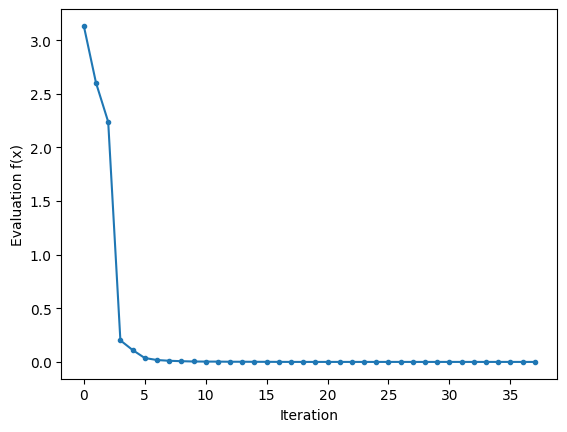

In [ ]:
# define population size
pop_size = 10
# define lower and upper bounds for every dimension
bounds = asarray([(-5.0, 5.0), (-5.0, 5.0)])
#bounds = asarray([(0.0, 5.0), (0.0, 5.0)])
# define number of iterations
iter = 100
# define scale factor for mutation
F = 0.5
# define crossover rate for recombination
cr = 0.7

# perform differential evolution
solution = differential_evolution(pop_size, bounds, iter, F, cr)
print('\nSolution: f([%s]) = %.5f' % (around(solution[0], decimals=5), solution[1]))
print(solution[2])
# line plot of best objective function values
pyplot.plot(solution[2], '.-')
pyplot.xlabel('Iteration')
pyplot.ylabel('Evaluation f(x)')
pyplot.show()

In [ ]:
fig = go.Figure()
# Define a list of symbols to use for each iteration
symbols = ['circle', 'square', 'diamond', 'cross', 'x','triangle-up','pentagon']  # Add more if needed
for i, (key, points) in enumerate(ALL_POP.items()):
    x_vals, y_vals = zip(*points)
    # Create text annotations with point values
    #text_annotations = [f"({x:.2f}, {y:.2f})" for x, y in points]
    text_annotations = [f"({key})" for _ in points]
    #print(text_annotations)
    fig.add_trace(go.Scatter(
        x=x_vals,
        y=y_vals,
        mode='markers+text',
        name=f"Iter {key}",
        #text=text_annotations,  # Use the created text annotations
        textposition="top center",
        textfont=dict(size=12, color='red'),  # Adjust size and color
        marker=dict(size=10,symbol=symbols[i % len(symbols)])
    ))

fig.update_layout(
    xaxis_title="X-axis",
    yaxis_title="Y-axis",
    title="Scatter Plot using Plotly"
)

fig.show()

In [ ]:
import plotly.graph_objects as go

# Assuming ALL_POP is your dictionary of data

fig = go.Figure()

# Create a list of traces, one for each key in ALL_POP
traces = []
for i, (key, points) in enumerate(ALL_POP.items()):
    x_vals, y_vals = zip(*points)
    traces.append(
        go.Scatter(
            x=x_vals,
            y=y_vals,
            mode='markers+text',
            name=f"Iter {key}",
            text=[f"({key})" for _ in points],
            textposition="top center",
            textfont=dict(size=12, color='red'),
            marker=dict(size=10, symbol=symbols[i % len(symbols)]),
            visible=(key == 0)  # Initially show only the first iteration's data
        )
    )

fig.add_traces(traces)

# Create slider steps
steps = []
for i in range(len(ALL_POP)):
    step = dict(
        method="update",
        args=[{"visible": [i == j for j in range(len(ALL_POP))]},
              {"title": f"Iteration {i}"}],  # Update title with iteration number
        label=f"Iteration {i}"
    )
    steps.append(step)

# Add slider to the layout
sliders = [dict(
    active=0,
    currentvalue={"prefix": "Iteration: "},
    pad={"t": 50},
    steps=steps
)]

fig.update_layout(
    xaxis_title="X-axis",
    yaxis_title="Y-axis",
    title="Scatter Plot using Plotly",
    sliders=sliders,
    xaxis=dict(range=[-5, 5]),  # Set x-axis range
    yaxis=dict(range=[-5, 5])   # Set y-axis range
)

fig.show()

In [ ]:
import plotly.graph_objects as go

# Assuming X, Y, Z, and ALL_POP are defined

fig = go.Figure(data=[go.Surface(z=Z, x=X, y=Y, colorscale='viridis', showlegend=False)])

# Create a list of traces for the scatter points
scatter_traces = []
for i, (key, point_set) in enumerate(ALL_POP.items()):
    scatter_traces.append(
        go.Scatter3d(
            x=point_set[:, 0],
            y=point_set[:, 1],
            z=[obj(point) for point in point_set],
            mode='markers',
            name=f'Points {key}',
            marker=dict(size=4, color=key, colorscale='Viridis'),
            visible=(key == 0)  # Initially show only the first iteration
        )
    )
fig.add_traces(scatter_traces)

# Create slider steps (Corrected)
steps = []
for i in range(len(ALL_POP)):
    step = dict(
        method="update",
        args=[{"visible": [True] + [i == j for j in range(len(ALL_POP))]},  # Keep surface visible (True)
              {"title": f"Iteration {i}"}],
        label=f"Iteration {i}"
    )
    steps.append(step)

# Add slider to the layout
sliders = [dict(
    active=0,
    currentvalue={"prefix": "Iteration: "},
    pad={"t": 50},
    steps=steps
)]

fig.update_layout(title='$f(x) = x_0^2 + x_1^2$ with Optimization Points',
                  scene=dict(xaxis_title='X', yaxis_title='Y', zaxis_title='f(x, y)'),
                  autosize=False,
                  width=800, height=600,
                  margin=dict(l=65, r=50, b=65, t=90),
                  sliders=sliders)

fig.show()

In [ ]:
def count_point_frequencies(data):
    point_freq = {}
    for key, points_list in data.items():
        if isinstance(points_list, np.ndarray):
            for point in points_list:
                point_tuple = tuple(point)
                point_freq[point_tuple] = point_freq.get(point_tuple, 0) + 1
    return point_freq

# Assuming your dictionary is named 'ALL_POP'
point_frequencies = count_point_frequencies(ALL_POP)

#for point, freq in point_frequencies.items():
#    print(f"Point {point}: Frequency = {freq}")
# Extract x, y, and z (frequency) values for plotting
x_vals = [point[0] for point in point_frequencies.keys()]
y_vals = [point[1] for point in point_frequencies.keys()]
z_vals = list(point_frequencies.values())
#print(x_vals)
#print(y_vals)
#print(z_vals)

In [ ]:
import plotly.graph_objects as go
fig = go.Figure(data=[go.Scatter3d(x=x_vals,
                                   y=y_vals,
                                   z=z_vals,
                                   mode='markers',
                                   marker=dict(size=10, color=z_vals))])
fig.show()

In [ ]:
for i in solution[3]:
  fig = plt.figure(figsize=(8, 6))
  ax = fig.add_subplot(111, projection='3d')
  ax.plot_surface(X, Y, Z, cmap='viridis')
  # Add the additional points (marked as 'x')
  ax.scatter(i[0], i[1], obj([i[0], i[1]]), c='red', marker='x', s=100, label='Additional Points')
  ax.set_title('Ackley Function')
  ax.set_xlabel('X')
  ax.set_ylabel('Y')
  ax.set_zlabel('f(x, y)')
  ax.view_init(elev=20, azim=30)
  print(i)
plt.show()

In [ ]:
!pip install plotly


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def ackley(x, y):
    arg1 = -0.2 * np.sqrt(0.5 * (x**2 + y**2))
    arg2 = 0.5 * (np.cos(2*np.pi*x) + np.cos(2*np.pi*y))
    return -20 * np.exp(arg1) - np.exp(arg2) + 20 + np.e

x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = ackley(X, Y)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')
ax.set_title('Ackley Function')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('f(x, y)')
ax.view_init(elev=20, azim=30)  # Adjust angles for rotation
plt.show()


In [ ]:
import plotly.graph_objects as go

#fig = go.Figure(data=[go.Scatter3d(x=X.flatten(), y=Y.flatten(), z=Z.flatten(), mode='markers')])
#fig.update_layout(scene=dict(aspectmode='cube'))
#fig.show()

# Create the 3D surface plot
fig = go.Figure(data=[go.Surface(z=Z, x=X, y=Y, colorscale='viridis')])

# Customize the layout
fig.update_layout(
    title='3D Surface Plot using Plotly',
    scene=dict(
        xaxis_title='X',
        yaxis_title='Y',
        zaxis_title='Z',

    )
)

# Show the plot
fig.show()


In [ ]:
type(solution[2])
np.array(solution[2])

In [ ]:
import numpy as np
import plotly.graph_objects as go

# Generate sample data (replace with your own)
#x = np.linspace(-5, 5, 100)
#y = np.linspace(-5, 5, 100)
#X, Y = np.meshgrid(x, y)
#Z = np.sin(np.sqrt(X**2 + Y**2))  # Example function (replace with your own)

# Create additional points (replace with your own data)
additional_x = solution[3][0]
additional_y = solution[3][1]
additional_z = np.array(solution[2])
print(additional_x)
print(additional_y)
print(additional_z)
#np.sin(np.sqrt(additional_x**2 + additional_y**2))  # Evaluate the function for these points

# Create the 3D surface plot
#fig = go.Figure(data=[go.Surface(z=Z, x=X, y=Y, colorscale='viridis')])
fig = go.Figure(data=[go.Surface(z=Z, x=X, y=Y, colorscale='viridis')])
# Add the specific points (marked as 'x')
fig.add_trace(go.Scatter3d(x=additional_x, y=additional_y, z=additional_z,
                           mode='markers', marker=dict(size=8, color='red'), name='Specific Points'))

# Customize the layout
fig.update_layout(
     title='3D Surface Plot with Specific Points',
    scene=dict(
        xaxis_title='X',
        yaxis_title='Y',
        zaxis_title='Z',

    )
)

# Show the plot
fig.show()
